   # =================================================
   # milestone 1

   # Nama  : vincent kaunang
   # Batch : HCK-016

   # membuat program untuk menganalisis data
   ### https://public.tableau.com/views/milestone1vincentkaunang/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
   # ================================================= -->

# Buisness Understanding

### S: menganalisis episode yg terbaik dari naruto shippuden
### M: menganalisis rating dan votenya
### A: melihat rating episodenya, dan melihat voting dari episode tersebut
### R: jika ratingnya bagus dan votenya banyak maka itu adalah yang terbaik
### T: dalam 1 minggu kedepan

## problem statement: saya ingin menganalisis episode mana yang terbaik dengan menganalis rating dan votenya, jika rating dan votenya bagus maka itu adalah episode yang terbaik dalam 1 minggu kedepan

## 5W + 1H

### 1. berapa rata-rata, median, modus, skewnes dan kurtosis pada rating (deskriptif)
### 2. tahun mana yang memiliki rata rata voting yang tertinggi
### 3. episode berapa yang vote yang paling tinggi (visual)
### 4. episode berapa yang memiliki rating yang paling tinggi (visual)
### 5. saga mana yang memiliki rata-rata rating yang paling tinggi (visual)
### 6. apakah saga s4 lebih baik daripada saga s1 berdasarkan voting(inferential)

# Data Loading

In [40]:
pip list

Package                   Version
------------------------- -----------
annotated-types           0.6.0
anyio                     4.3.0
archspec                  0.2.3
asttokens                 2.4.1
attrs                     23.2.0
beautifulsoup4            4.12.3
boltons                   23.0.0
Brotli                    1.0.9
bs4                       0.0.2
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        2.0.4
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
conda                     24.3.0
conda-content-trust       0.2.0
conda-libmamba-solver     23.12.0
conda-package-handling    2.2.0
conda_package_streaming   0.9.0
contourpy                 1.2.1
cryptography              42.0.5
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
distro                    1.8.0
exceptiongroup            1.2.0
executing                 2.0.1
fastapi             

In [41]:
import pandas as pd
import scipy as stats
import numpy as np

In [42]:
df = pd.read_csv('naruto.csv', encoding= "ISO-8859-1")

In [43]:
df

,Unnamed: 0,Num_episode,Title,Type,Year_launch,Rate,Votes,Saga,Airdate
0,1,1,Homecoming,Mixed Canon/Filler,2007,8.2,728,s1 Kazekage Rescue,2007-02-15
1,2,2,The Akatsuki Makes Its Move,Mixed Canon/Filler,2007,8.0,575,s1 Kazekage Rescue,2007-02-15
2,3,3,The Results of Training,Mixed Canon/Filler,2007,8.0,508,s1 Kazekage Rescue,2007-02-22
3,4,4,The Jinchuriki of the Sand,Mixed Canon/Filler,2007,8.2,517,s1 Kazekage Rescue,2007-03-01
4,5,5,The Kazekage Stands Tall,Mixed Canon/Filler,2007,8.2,486,s1 Kazekage Rescue,2007-03-15
...,...,...,...,...,...,...,...,...,...
495,496,496,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.5,313,s21 Series,2017-02-23
496,497,497,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.2,301,s21 Series,2017-03-02
497,498,498,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,6.8,305,s21 Series,2017-03-09
498,499,499,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.6,323,s21 Series,2017-03-16


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   500 non-null    int64  
 1   Num_episode  500 non-null    int64  
 2   Title        500 non-null    object 
 3   Type         500 non-null    object 
 4   Year_launch  500 non-null    int64  
 5   Rate         500 non-null    float64
 6   Votes        500 non-null    int64  
 7   Saga         500 non-null    object 
 8   Airdate      500 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 35.3+ KB


In [45]:
df.duplicated().sum()

0

# Data cleaning

In [46]:
df.isnull().sum()

Unnamed: 0     0
Num_episode    0
Title          0
Type           0
Year_launch    0
Rate           0
Votes          0
Saga           0
Airdate        0
dtype: int64

disini dapat kita lihat ternyata tidak terdapaat missing value

In [47]:
#mengubah kolom ke tipe date titme
df['Airdate'] = pd.to_datetime(df['Airdate'])

In [48]:
df.columns

Index(['Unnamed: 0', 'Num_episode', 'Title', 'Type', 'Year_launch', 'Rate',
       'Votes', 'Saga', 'Airdate'],
      dtype='object')

In [49]:
df.drop('Unnamed: 0', axis=1)

,Num_episode,Title,Type,Year_launch,Rate,Votes,Saga,Airdate
0,1,Homecoming,Mixed Canon/Filler,2007,8.2,728,s1 Kazekage Rescue,2007-02-15
1,2,The Akatsuki Makes Its Move,Mixed Canon/Filler,2007,8.0,575,s1 Kazekage Rescue,2007-02-15
2,3,The Results of Training,Mixed Canon/Filler,2007,8.0,508,s1 Kazekage Rescue,2007-02-22
3,4,The Jinchuriki of the Sand,Mixed Canon/Filler,2007,8.2,517,s1 Kazekage Rescue,2007-03-01
4,5,The Kazekage Stands Tall,Mixed Canon/Filler,2007,8.2,486,s1 Kazekage Rescue,2007-03-15
...,...,...,...,...,...,...,...,...
495,496,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.5,313,s21 Series,2017-02-23
496,497,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.2,301,s21 Series,2017-03-02
497,498,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,6.8,305,s21 Series,2017-03-09
498,499,"Hidden Leaf Story, the Perfect Day for a Weddi...",Manga Canon,2017,7.6,323,s21 Series,2017-03-16


In [50]:
del df['Unnamed: 0']

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Num_episode  500 non-null    int64         
 1   Title        500 non-null    object        
 2   Type         500 non-null    object        
 3   Year_launch  500 non-null    int64         
 4   Rate         500 non-null    float64       
 5   Votes        500 non-null    int64         
 6   Saga         500 non-null    object        
 7   Airdate      500 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 31.4+ KB


disini saya melakukan data conversion mengubah tipe data airdate dari tipe object, menjadi tipe date time

In [52]:
df['Saga'].unique()

array(['s1 Kazekage Rescue', 's2 Long-Awaited Reunion',
       's3 Twelve Guardian Ninja', 's4 Immortal Devastators',
       's5 The Three-Tailed Demon Turtle', 's6 Prophecy and Vengeance',
       's7 The Six-Tailed Demon Slug', 's8 Two Saviors',
       's9 The Locus Of Konoha', 's10 The Gathering of the Five Kage',
       's11 Paradise On The Ship',
       's12 Nine-Tailed Fox Taming And Karmic Encounters',
       's13 The Seven Shinobi Swordsmen',
       's14 The Fourth Great Ninja War - Assailants From Afar',
       's15 The Fourth Great Ninja War - Sasuke And Itachi',
       's16 Kakashi: Shadow Of The Anbu Black Ops',
       's17 The Fourth Great Ninja War - The Return Of Squad Seven',
       's18 The Fourth Great Ninja War - Obito Uchiha Against The Shinobi Forces',
       "s19 Naruto'S Back ~The Tracks Of His Friends",
       's20 Infinite Tsukuyomi: The Invocation', 's21 Series'],
      dtype=object)

# Analisis

## 1.

In [53]:
df['Rate'].mean()

7.360600000000001

rata-rata rating dari 500 episode di naruto adalah 7.3

In [54]:
df['Rate'].median()

7.5

In [55]:
df['Rate'].mode()[0]

8.4

ternyata ada banyak episode di naruto yang ratingnya bisa mencapai 8.4

In [56]:
df['Rate'].skew()

-0.35044762570130383

In [57]:
df['Rate'].kurtosis()

-0.7845000279710463

ternyata kalau bisa kita lihat ternyata distribusi yang terjadi disini adalah distribusi normal

## 2.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Year_launch'>

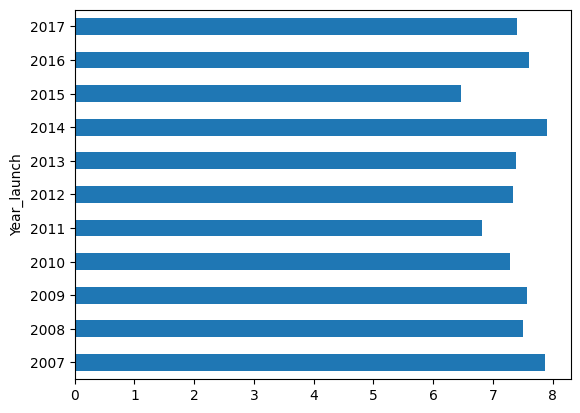

In [59]:
df.groupby(['Year_launch'])['Rate'].mean().plot(kind='barh')

dapat dilihat disini ternyata tahun yang memiliki rating paling tinggi adalah tahun 2014

# 3. 

<Axes: xlabel='Num_episode'>

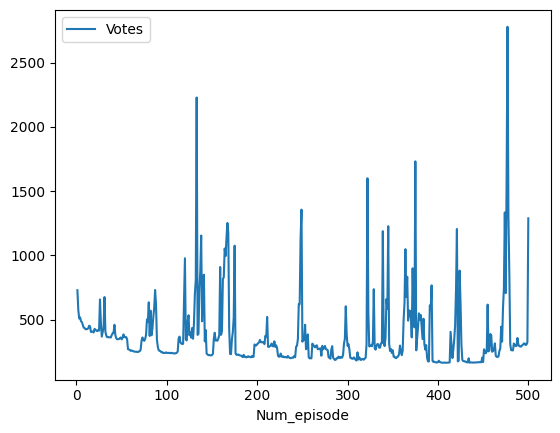

In [68]:
df.plot(kind='line',x="Num_episode",y="Votes")

ternyata episode  499 memiliki rating yang paling tinggi

# 4

<Axes: xlabel='Num_episode'>

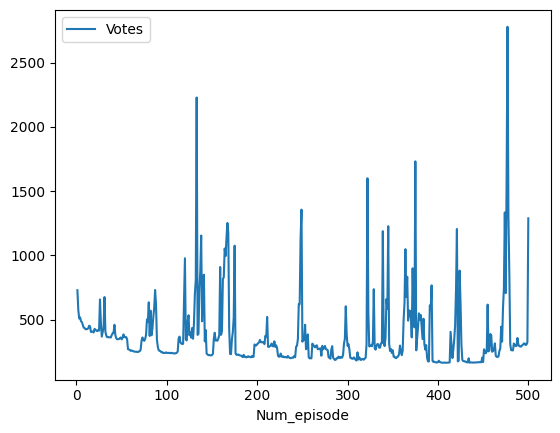

In [61]:
df.plot(kind='line',x="Num_episode",y="Votes")

episod yang memiliki vote tertinggi adalah episode 498

# 5

<Axes: ylabel='Saga'>

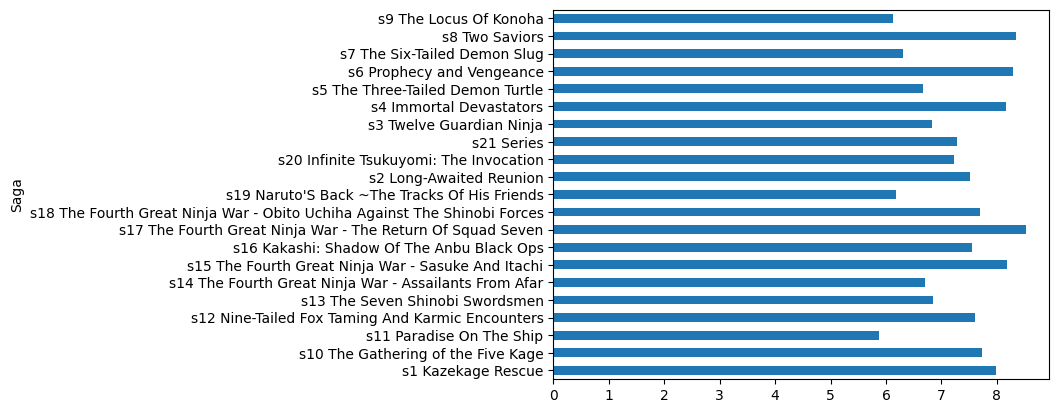

In [62]:
df.groupby(['Saga'])['Rate'].mean().plot(kind='barh')

ternyata saga 17 memiliki rata-rata rating yang paling tinggi

# 6.

In [63]:
import scipy as stats

In [64]:
s1 = df[df['Saga'].str.contains('s1 Ka')]
s4 = df[df['Saga'].str.contains('s4')]

In [65]:
import numpy as np

In [66]:
from scipy import stats

# H0: s4 lebih baik 
# H1: s1 lebih baik

In [67]:
t_stat, p_val = stats.ttest_ind(s1['Votes'], s4['Votes'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) 

T-Statistic: -0.14193656226242116
P-value: 0.8877367962293925


ternyata dapat kita lihat s1 masih jauh lebih baik dariipada s4

# Kesimpulan

jadi daapat kiita lihat dari hasil analisa ternyata episode yang paling menarik berdasarkan rating adalah episode 499, tetapi jika berdasarkan saga, ternyata saga 17 yang sangat populer, jadi kesimpulannya adalah episode-episode yang ada di saga 17 adalah episode yang terbaik